# Pytorch computer vision

## 0. Computer vision libraries in PyTorch

* [torchvision](https://pytorch.org/vision/stable/index.html)
* `torchvision.datasets`
* `torchvision.models`
* `torchvision.transforms`
* `torch.utils.data.Dataset`
* `torch.utils.data.DataLoader`

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.2
0.17.2


## 1. Getting a dataset

The dataset we will be using is `FashionMNIST`.

In [2]:
# setup training data
train_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # do we want the training dataset
    download=True, # do we want to download it?
    transform=ToTensor(), # how do we wanto to transform the data?
    target_transform=None # how do we wanto to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# check the shape
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Text(0.5, 1.0, '9')

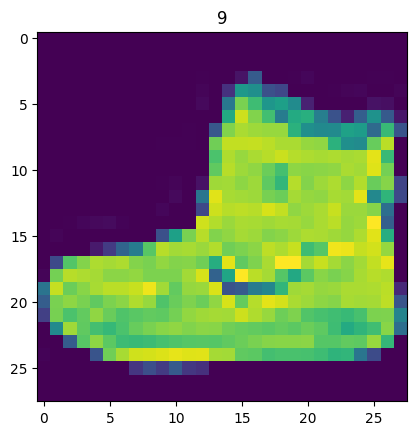

In [9]:
plt.imshow(image.squeeze())
plt.title(label)

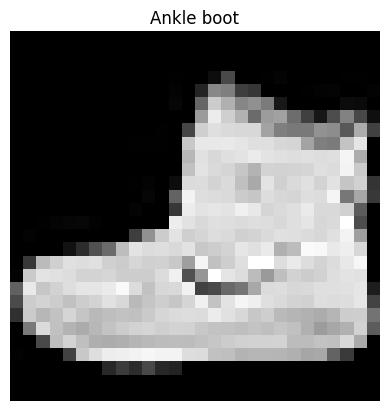

In [10]:
plt.imshow(image.squeeze(), cmap='grey')
plt.title(class_names[label])
plt.axis(False);

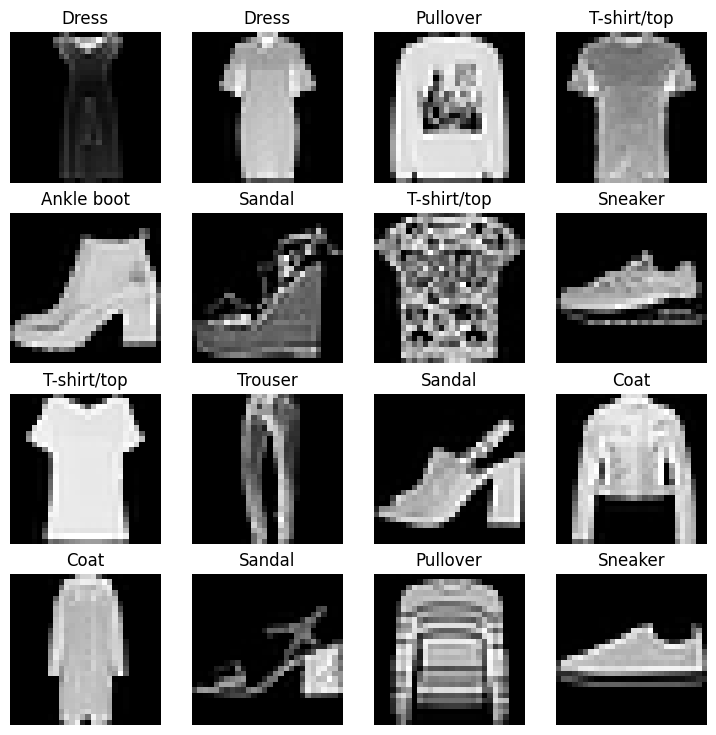

In [11]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='grey')
    plt.title(class_names[label])
    plt.axis(False);

Do you think thses items would need non-linearity or not?


## 2. Prepare DataLoader

Right now, the data is in the form of PyTorch Dataset.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or minibatches).

Why would we do this:
1. It is more computationally efficient, as in, your computer hardare may not be able to look (store in memory) ay 6000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradient per epochs.

More info: https://www.youtube.com/watch?v=4qJaSmvhxi8

In [12]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x11983fc70>,
 <torch.utils.data.dataloader.DataLoader at 0x11985ff10>)

In [13]:
# Lets check
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x11983fc70>, <torch.utils.data.dataloader.DataLoader object at 0x11985ff10>)
Length of the train_dataloader: 1875 batches of 32
Length of the test_dataloader: 313 batches of 32


In [14]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

(-0.5, 27.5, 27.5, -0.5)

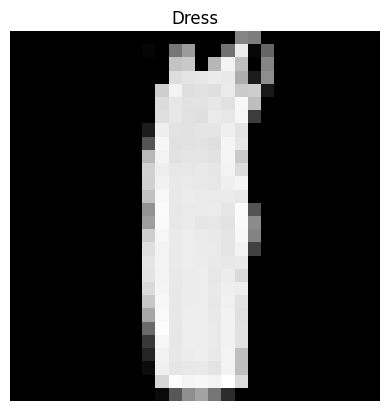

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='grey')
plt.title(class_names[label])
plt.axis(False)

## 3. Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: star simply and add complexity when necessary.

In [16]:
# Create a flattern layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]


# Flatten the sample
output = flatten_model(x)

print(f"Shape before flatenning:{x.shape} -> [color channe, height, width]")
print(f"Shape after flatenning:{output.shape} -> [color channe, height*width]")

Shape before flatenning:torch.Size([1, 28, 28]) -> [color channe, height, width]
Shape after flatenning:torch.Size([1, 784]) -> [color channe, height*width]


In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - for multiclass data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()`
* Evaluation metric - for classification metric, we can use accuracy

In [21]:
import requests
# https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py
from pathlib import Path

# Download helper functions from repository
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists... skipping")
else:
    print("Dowloading function")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import accuracy_fn

/Users/admin/courses/PyTorch-Fundamentals/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


helper_functions.py already exists... skipping


In [22]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time out experiments

ML isvery experimental.

Two main things to track:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [23]:
from timeit import default_timer as timer

def print_train_times(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time

    Args:
        start (float): _description_
        end (float): _description_
        device (torch.device, optional): _description_. Defaults to None.
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [24]:
start_time = timer()
# some code...
end_time = timer()
print_train_times(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


5.596599999080354e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the loss **per batch**.
4. Print out whats happenin'
5. time it all (for fun)

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"poch: {epoch}\n-----")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. backwards
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # Printing
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    #Divice total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulated)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate acc
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate test acc average per batch
        test_acc /= len(test_dataloader)


    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_times(start=train_time_start_on_cpu,
                                             end=train_time_end_on_cpu,
                                             device = str(next(model_0.parameters()).device))

/Users/admin/courses/PyTorch-Fundamentals/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

poch: 0
-----
Looked at 0/60000 samples.


Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:26<00:53, 26.84s/it]


Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
poch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:56<00:28, 28.53s/it]


Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
poch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [01:25<00:00, 28.63s/it]


Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 85.926 seconds


## 4. Make predictions and get Model_0 results

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device) -> dict:
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): _description_
        data_loader (torch.utils.data.DataLoader): _description_
        loss_fn (torch.nn.Module): _description_
        accuracy_fn (_type_): _description_

    Returns:
        dict: _description_
    """
    loss, acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device='cpu')
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

100%|██████████| 313/313 [00:02<00:00, 125.89it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using GPU if there is one)

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

In [28]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [29]:
# Create an instance ofmodel_!
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [30]:
# Setup loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with model trying to learn on data_loader

    Args:
        model (torch.nn.Module): _description_
        data_loader (torch.utils.data.DattaLoader): _description_
        loss_fn (torch.nn.Module): _description_
        optimizer (torch.optim.Optimizer): _description_
        accuracy_fn (_type_): _description_
        device (torch.device, optional): _description_. Defaults to device.
    """
    train_loss, train_acc = 0, 0

    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (outputs the raw logits from the model)
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [32]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data_loader

    Args:
        model (torch.nn.Module): _description_
        data_loader (torch.utils.data.DataLoader): _description_
        loss_fn (torch.nn.Module): _description_
        accuracy_fn (_type_): _description_
        device (torch.device, optional): _description_. Defaults to device.
    """
    ### Testing
    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
        # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass (outputs raw logits)
            test_pred = model(X)

            # 2. Calculuate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [33]:
torch.manual_seed(42)

train_time_start_on_gpu = timer()

# set epochs
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}")
    train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
    test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1= print_train_times(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0


Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:31<01:03, 31.74s/it]

Test loss: 0.95636 | Test acc: 65.00%

Epoch 1
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [01:05<00:32, 32.64s/it]

Test loss: 0.72227 | Test acc: 73.91%

Epoch 2
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [01:32<00:00, 30.79s/it]

Test loss: 0.68500 | Test acc: 75.02%

Train time on cpu: 92.375 seconds


**NOTE**: Sometimes, depending on ypur data/hardware you might find that your model trains faster on CPU than GPU

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU
2. The hardware you're using is better CPU in terms compute capability than the GPU.

In [34]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

100%|██████████| 313/313 [00:03<00:00, 81.32it/s] 


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data.

In [66]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """Model architecture that replicates the TinyVGG
    model from CNN explainer website."""
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return x

In [40]:
image.shape

torch.Size([1, 28, 28])

In [67]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)

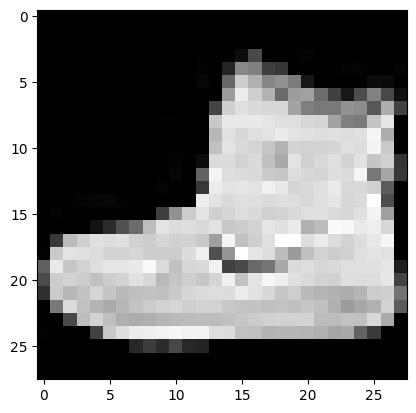

In [58]:
plt.imshow(image.squeeze(), cmap='grey')

In [68]:
model_2(image.unsqueeze(0).to(device))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

https://poloclub.github.io/cnn-explainer/

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [50]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(test_image.shape)

torch.Size([3, 64, 64])


In [52]:
torch.manual_seed(42)

# Create single conv2d layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=(3, 3),
    stride=1,
    padding=0
    )

# Pass the data through the conv layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [53]:
test_image.shape

torch.Size([3, 64, 64])

In [55]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through
test_image_through_conve = conv_layer(test_image.unsqueeze(0))
print(f"Test image after going through conv_layer: {test_image_through_conve.shape}")

test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conve)
print(f"Shape after going through conv_layer: {test_image_through_conv_and_maxpool.shape}")
print(f"Shape after going through conv and maxpool layers: {test_image_through_conv_and_maxpool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Test image after going through conv_layer: torch.Size([1, 10, 62, 62])
Shape after going through conv_layer: torch.Size([1, 10, 31, 31])
Shape after going through conv and maxpool layers: torch.Size([1, 10, 31, 31])


### 7.3 Tra